# Task 2 - Exploratory Data Analysis 


• The background information for this task:

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

• The data that was sent over includes:

    ♦ Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
    ♦ Historical pricing data: variable and fixed pricing data etc
    ♦ Churn indicator: whether each customer has churned or not



Sub-Task 1:
•  Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset.

Sub-Task 2:
• Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it.

# 1: Importing Necessary Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# 2: Importing Dataset

In [2]:
df_client=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\bcg\\client_data.csv")

In [3]:
df_price=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\\\Desktop\\bcg\\price_data.csv")

In [4]:
df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


♦ With the client data, we have a mix of numeric and categorical data, which we will need to transform before modelling later.

In [5]:
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


♦ With the price data, it is purely numeric data but we can see a lot of zeros.

# 3: Descriptive Statistics of Data

In [55]:
print("Rows and Columns of Client Data :- ", df_client.shape)
print("Rows and Columns of Price Data :- ", df_price.shape)

Rows and Columns of Client Data :-  (14606, 26)
Rows and Columns of Price Data :-  (193002, 8)


In [6]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


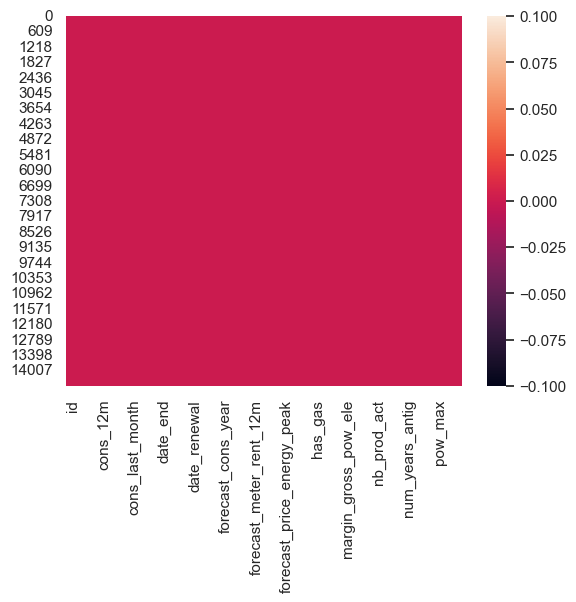

In [50]:
sns.heatmap(df_client.isnull())
plt.show()

In [51]:
df_client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

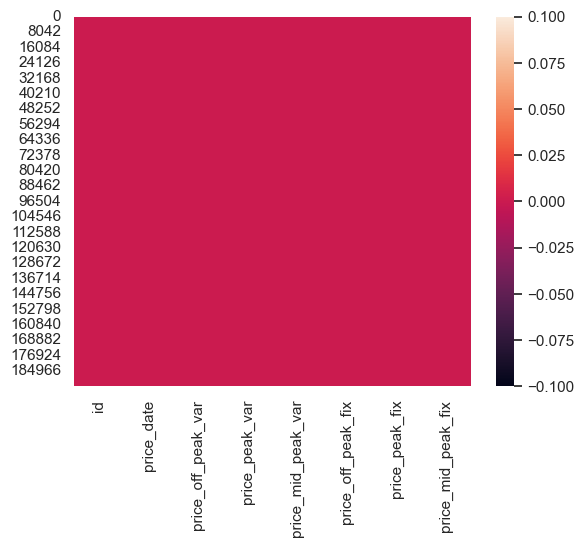

In [52]:
sns.heatmap(df_price.isnull())
plt.show()

In [53]:
df_price.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

 •♦• As we can see there is no missing values in both dataset.

# Statistics

In [8]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


♦ The describe method gives us a lot of information about the client_data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [9]:
df_price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


♦ Overall the price data looks good.

# 3: Data visualization

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

# Churn

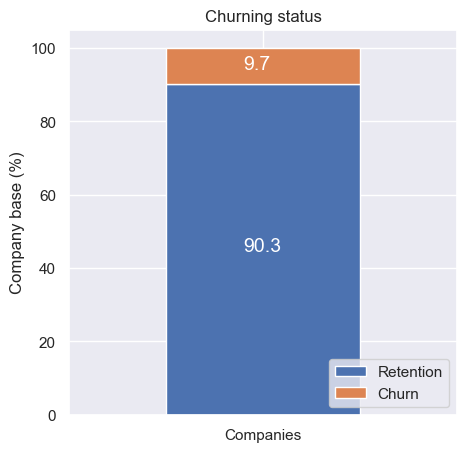

In [56]:
churn = df_client[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

 •♦• Insight: Nearly 10% (9.7%) of the customers have churned and 90% of the customers have not churned.

# Sales channel

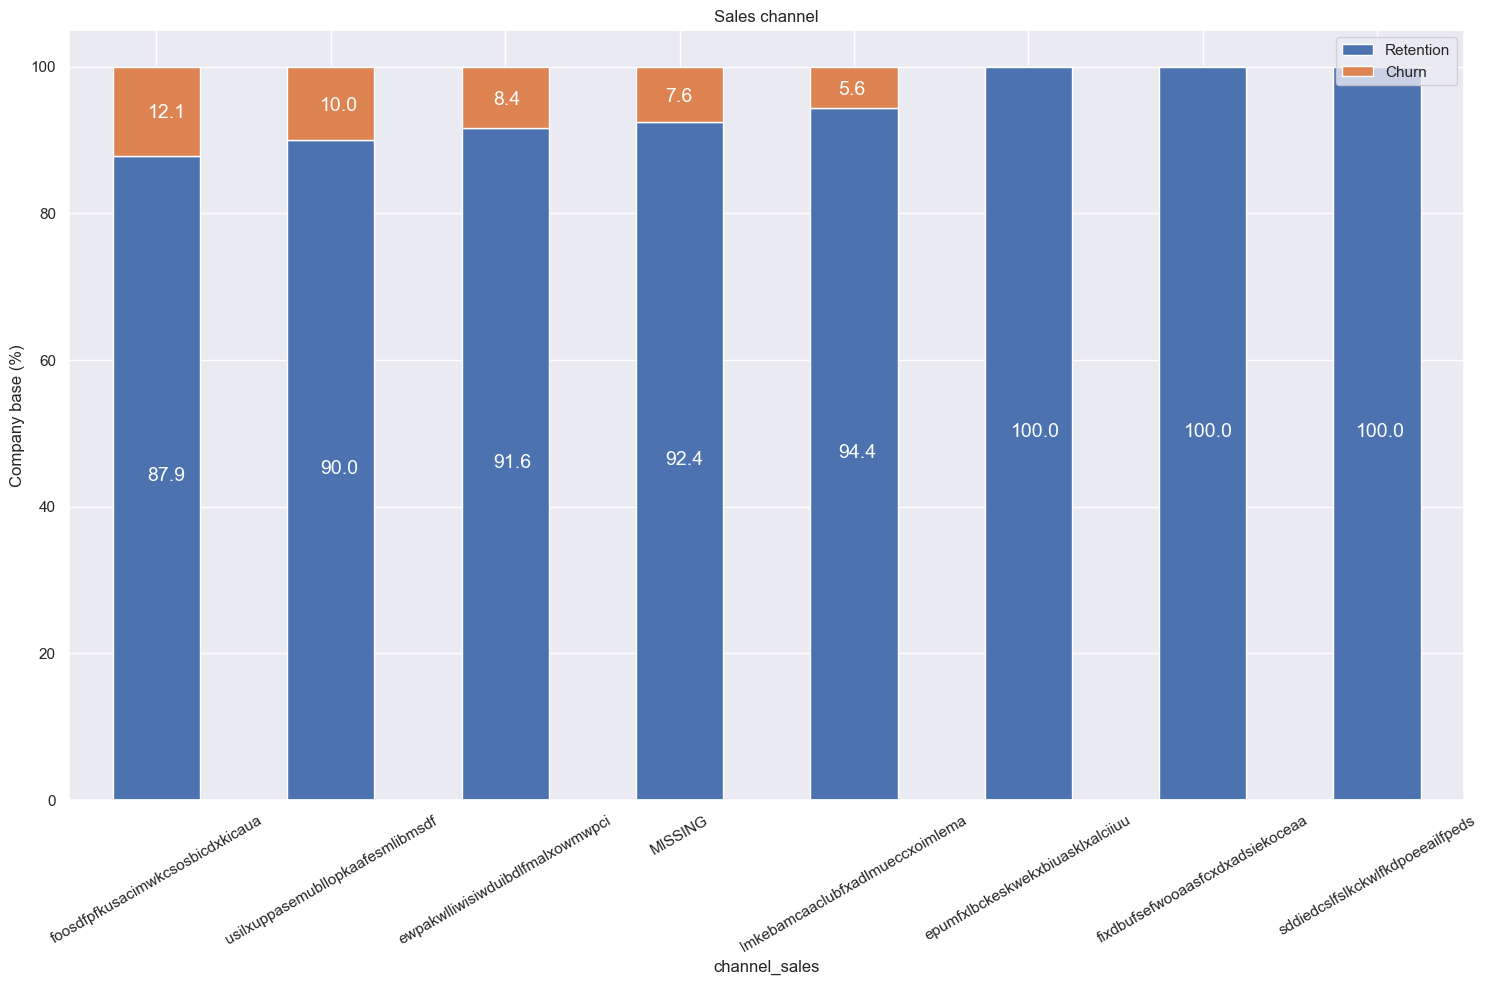

In [57]:
channel = df_client[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

♦ Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

# Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [58]:
consumption = df_client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


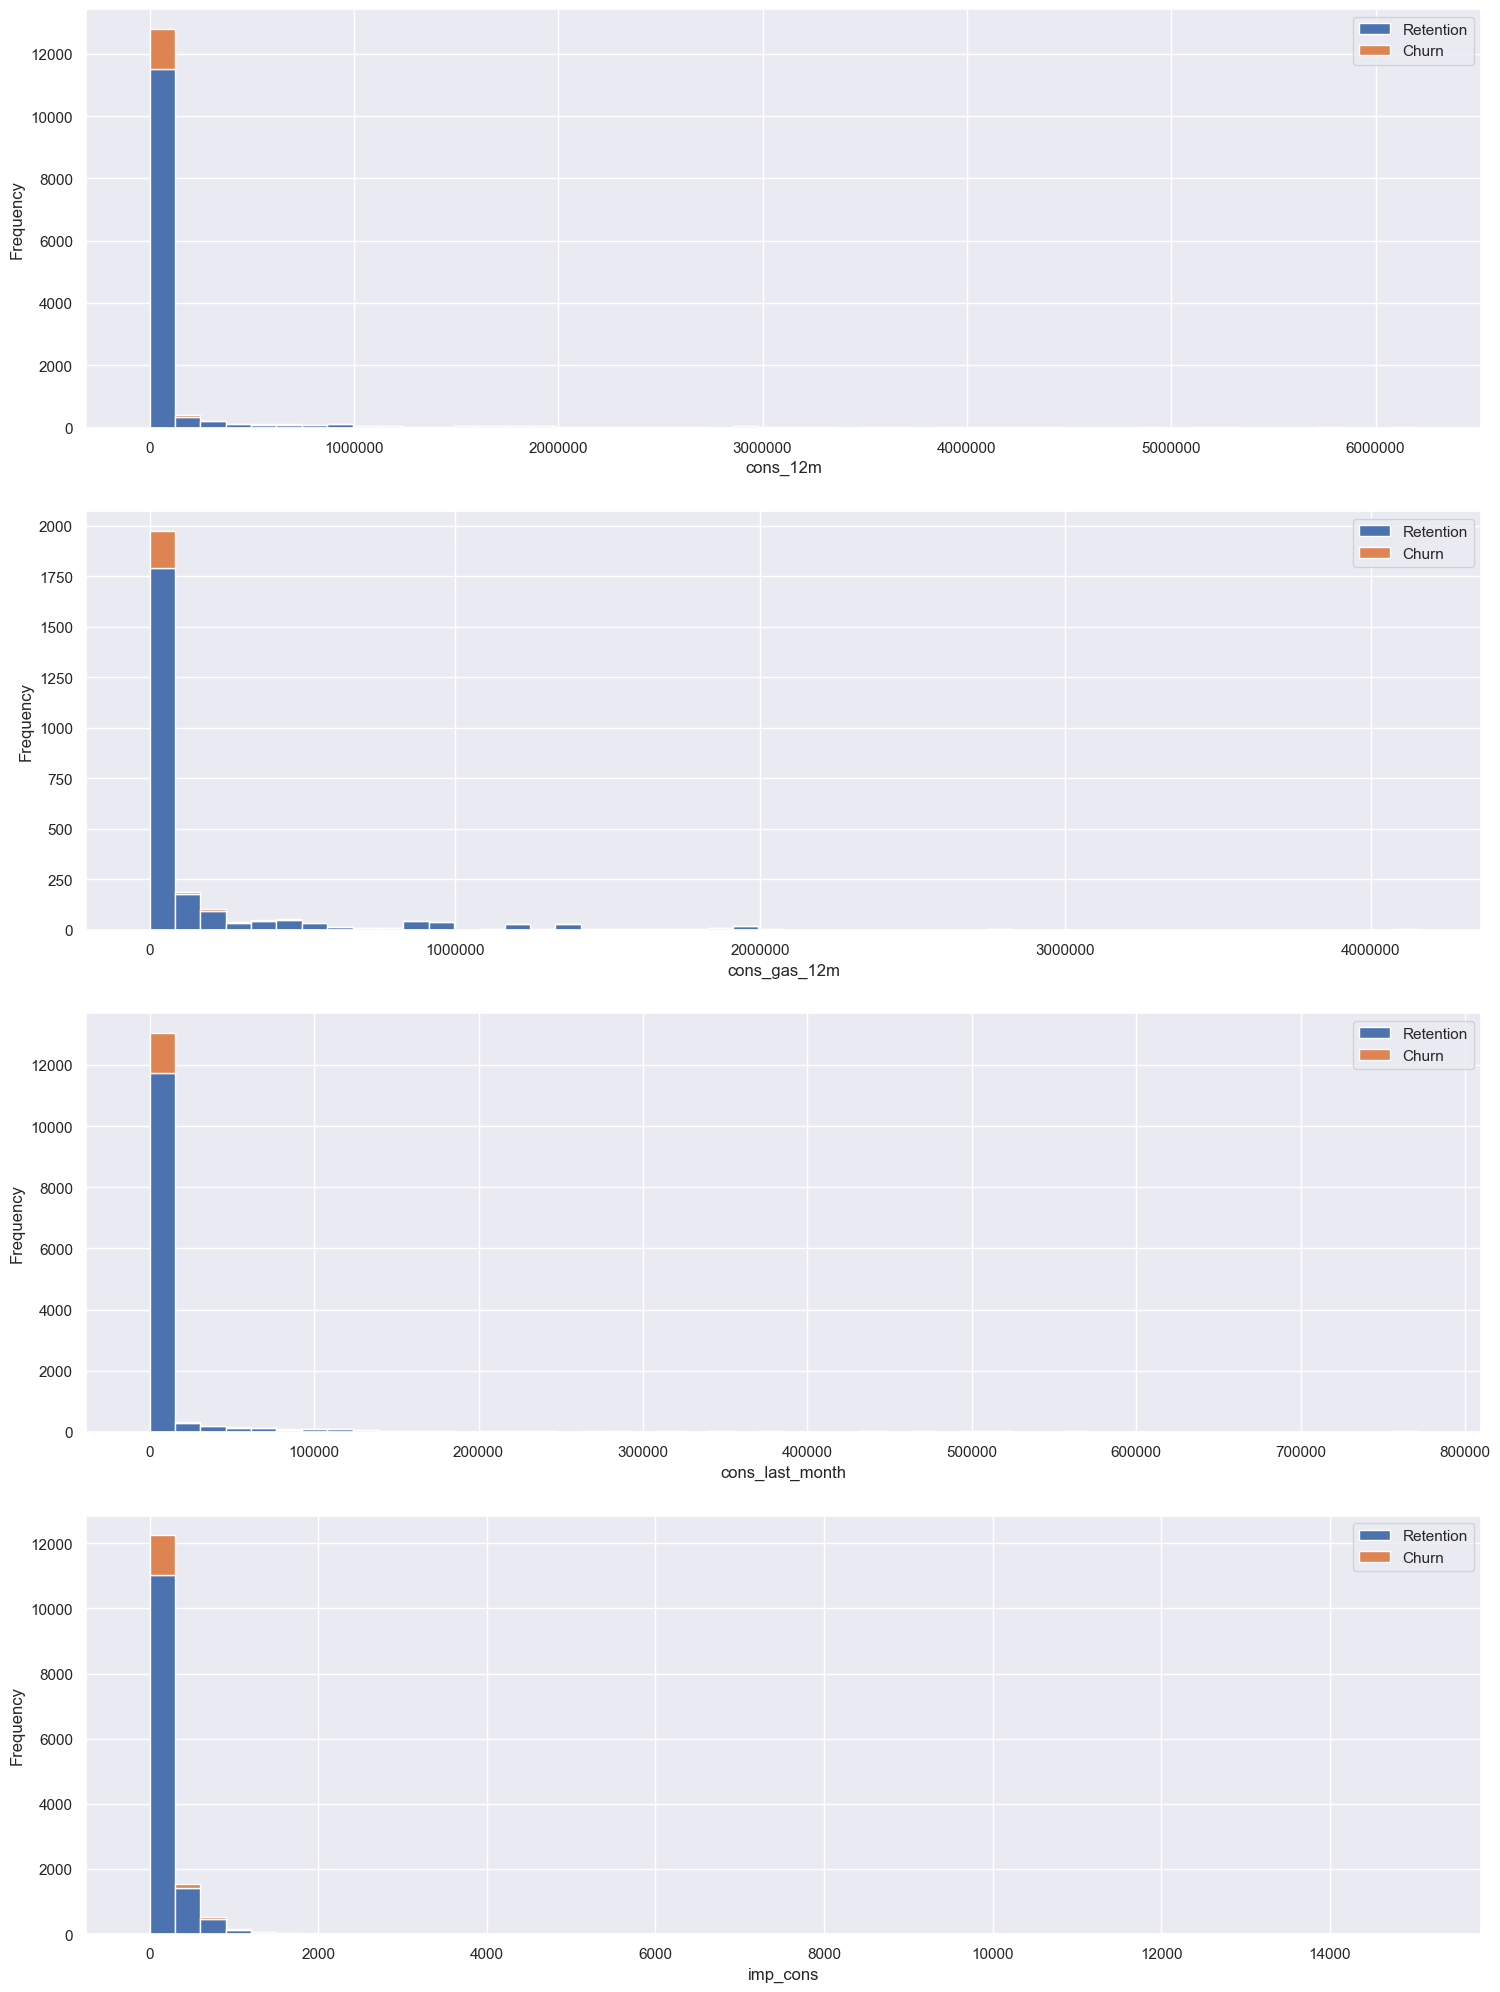

In [23]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")

•♦• The consumption data is clearly significantly positively skewed and has a very long right tail toward the upper values of the distribution. Outliers are most likely to be found in the values at the upper and lower ends of the distribution. To see the outliers more clearly, we might employ a common plot. A boxplot is a common visual representation of the distribution using a five-number summary as the basis:

                                                ♦ Minimum
                                                ♦ First quartile (Q1)
                                                ♦ Median
                                                ♦ Third quartile (Q3)
                                                ♦ Maximum

    •♦• It can uncover anomalies and their values. Additionally, it can reveal the degree to which our data is grouped, symmetrical, and skewed.

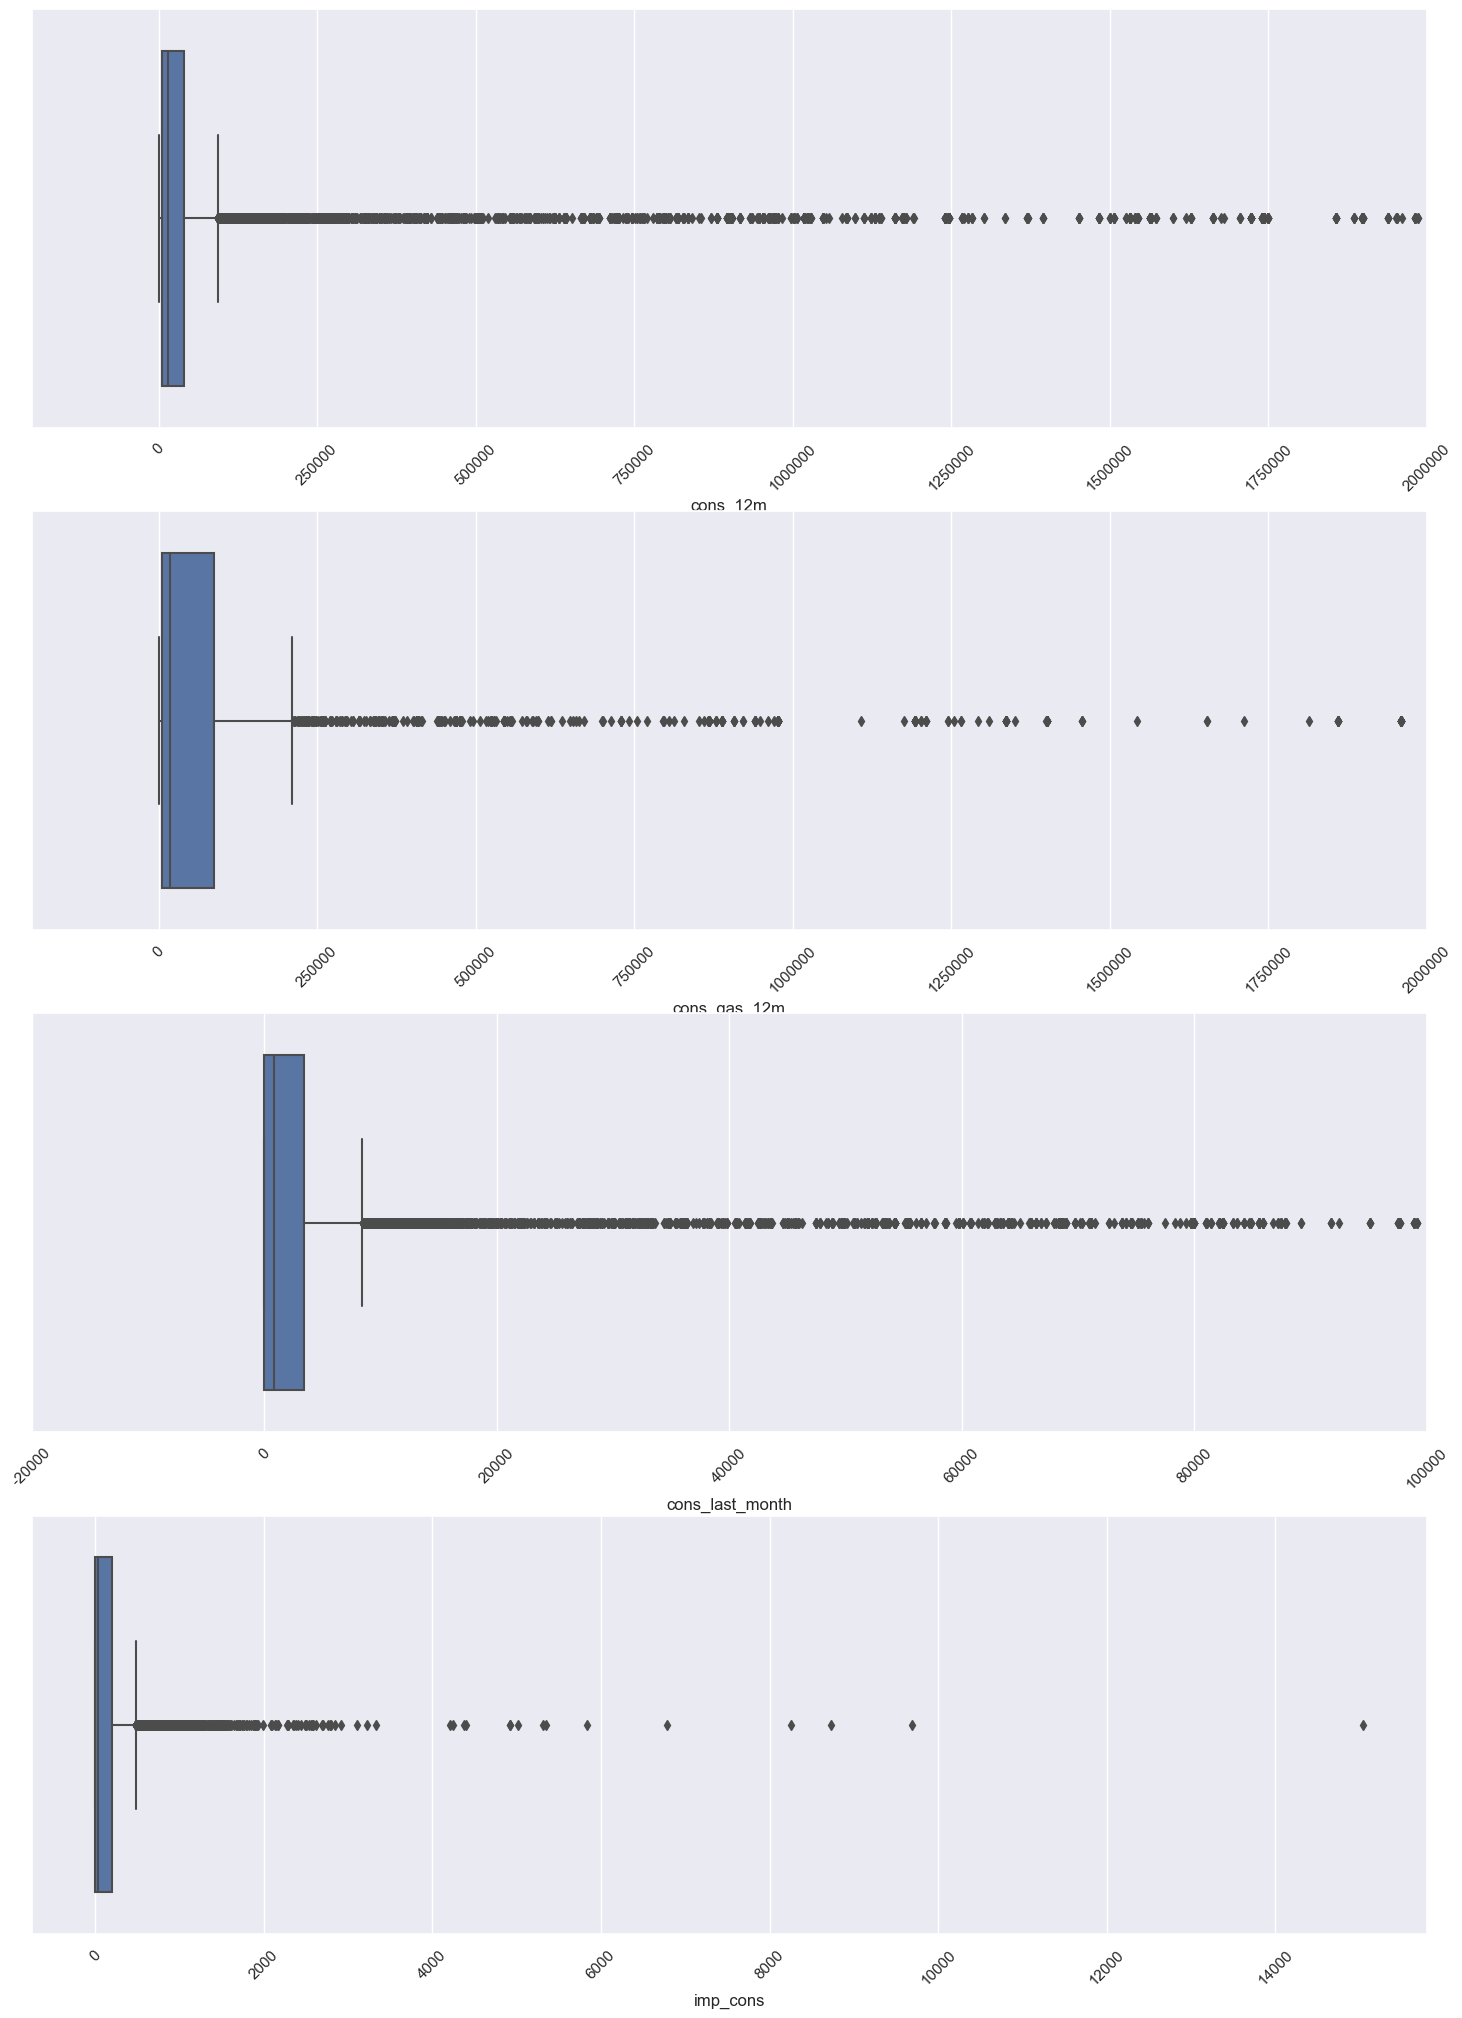

In [24]:
import matplotlib.ticker as ticker

# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot boxplots
sns.boxplot(data=consumption, x="cons_12m", ax=axs[0])
sns.boxplot(data=consumption[consumption["has_gas"] == "t"], x="cons_gas_12m", ax=axs[1])
sns.boxplot(data=consumption, x="cons_last_month", ax=axs[2])
sns.boxplot(data=consumption, x="imp_cons", ax=axs[3])

# Set x-axis limits
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

# Remove scientific notation and set x-axis labels
for ax in axs:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))
    ax.tick_params(axis='x', labelrotation=45)

# Show the plots
plt.show()


 •♦• In the following exercise, feature engineering, we'll address skewness and outliers.

# Forecast

In [25]:
forecast = df_client[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


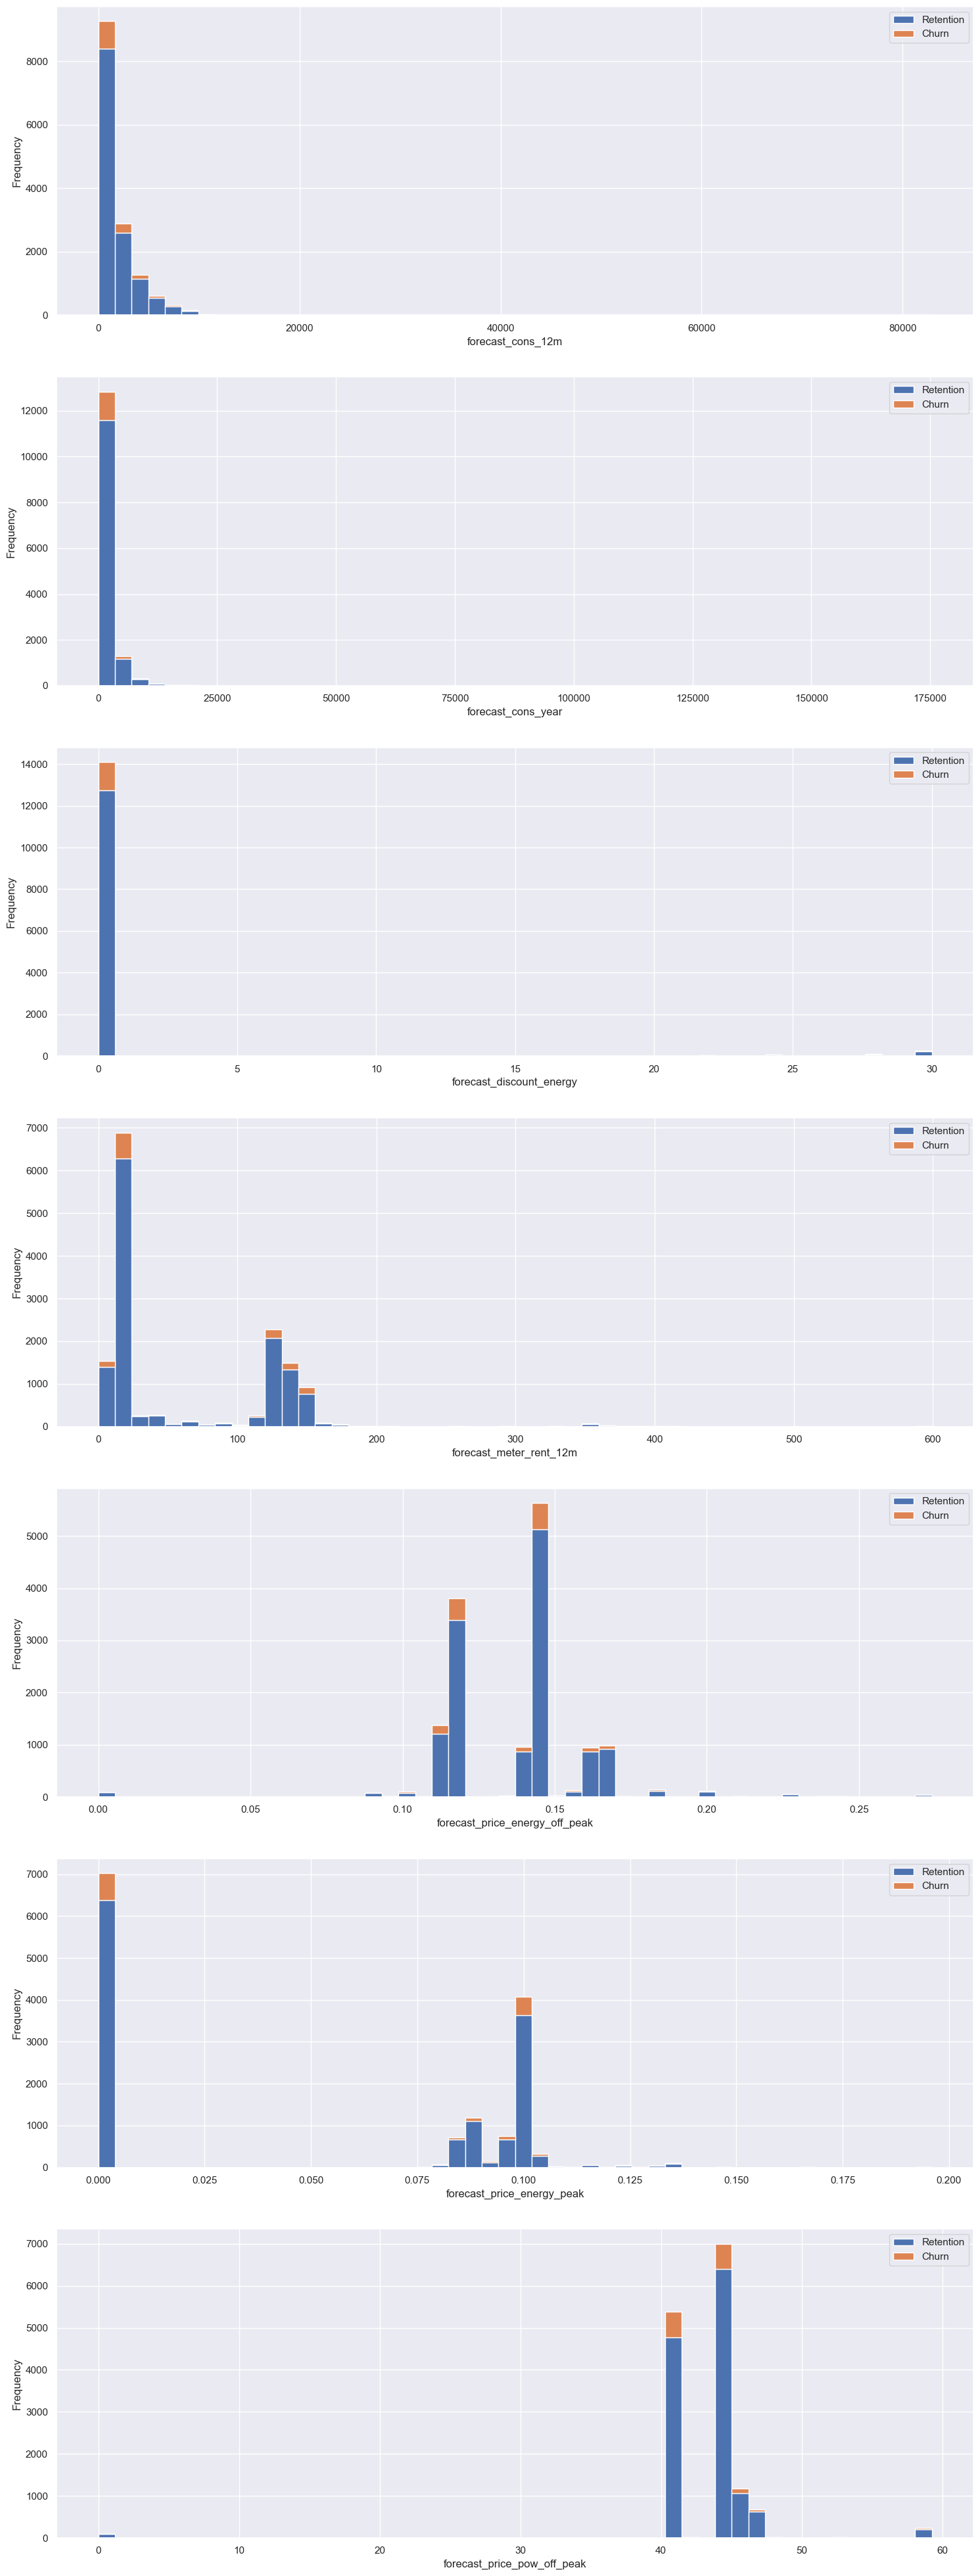

In [26]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(df_client, "forecast_cons_12m", axs[0])
plot_distribution(df_client, "forecast_cons_year", axs[1])
plot_distribution(df_client, "forecast_discount_energy", axs[2])
plot_distribution(df_client, "forecast_meter_rent_12m", axs[3])
plot_distribution(df_client, "forecast_price_energy_off_peak", axs[4])
plot_distribution(df_client, "forecast_price_energy_peak", axs[5])
plot_distribution(df_client, "forecast_price_pow_off_peak", axs[6])

plt.savefig("View of Forecast.png", bbox_inches="tight")

•♦• We can see that several of the variables are significantly positively skewed, giving a very long tail for the higher values, similar to the consumption plots. To account for this skewness, we shall do certain adjustments during future engineering.

# Contract type

In [27]:
contract_type = df_client[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [28]:
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


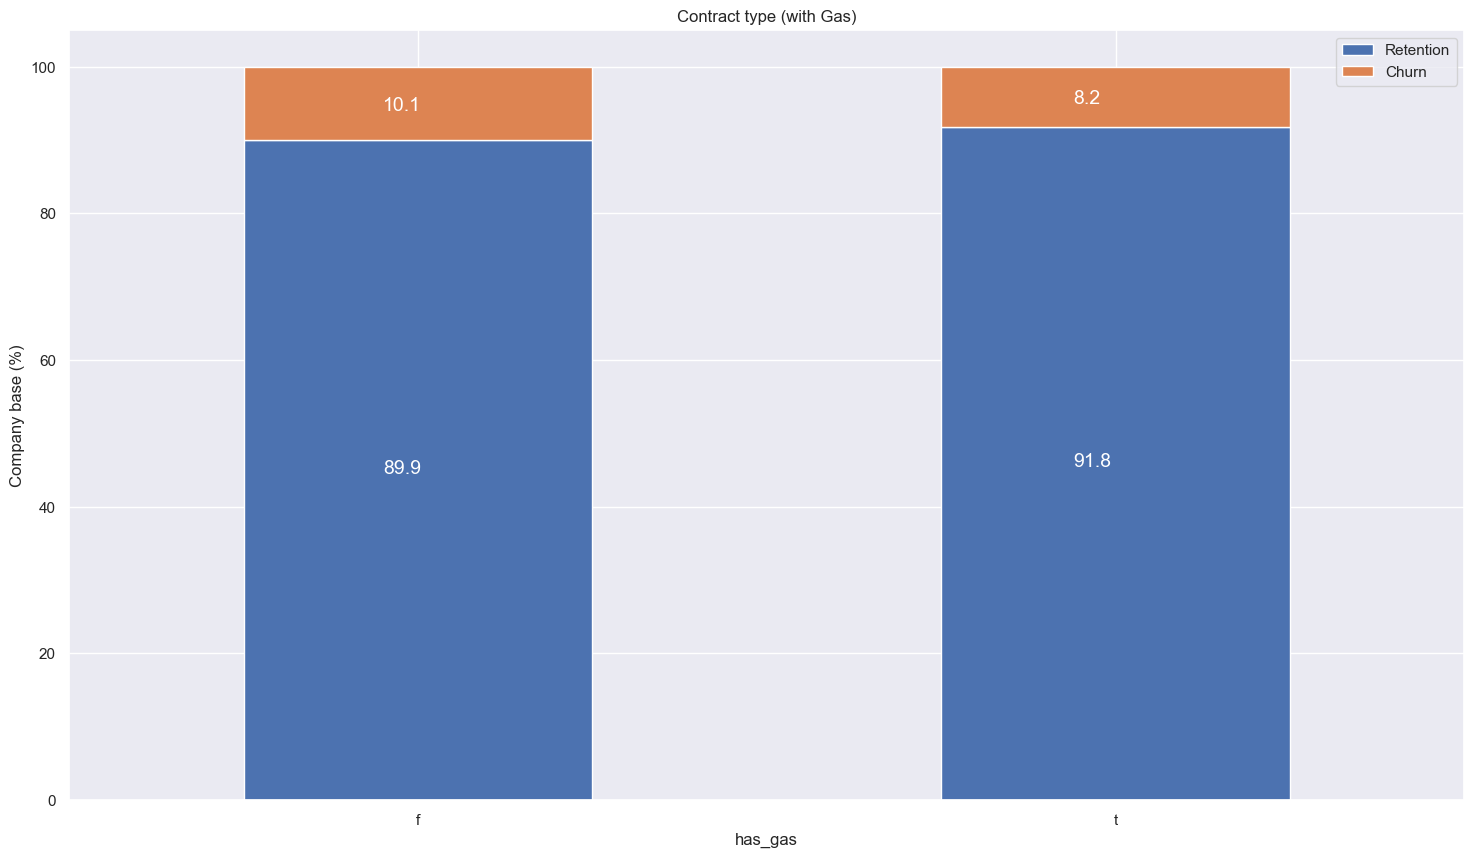

In [29]:
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)')

# Margins

In [30]:
margin = df_client[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

In [31]:
def box_plot_all_columns(dataframe, figsize=(18,20)):
   
    numeric_columns = dataframe.select_dtypes(include=[int, float]).columns

    
    plt.figure(figsize=figsize)

    
    for i, column in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), 1, i + 1)
        sns.boxplot(data=dataframe, x=column, orient='h')
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)

    
    plt.tight_layout()

    
    plt.show()

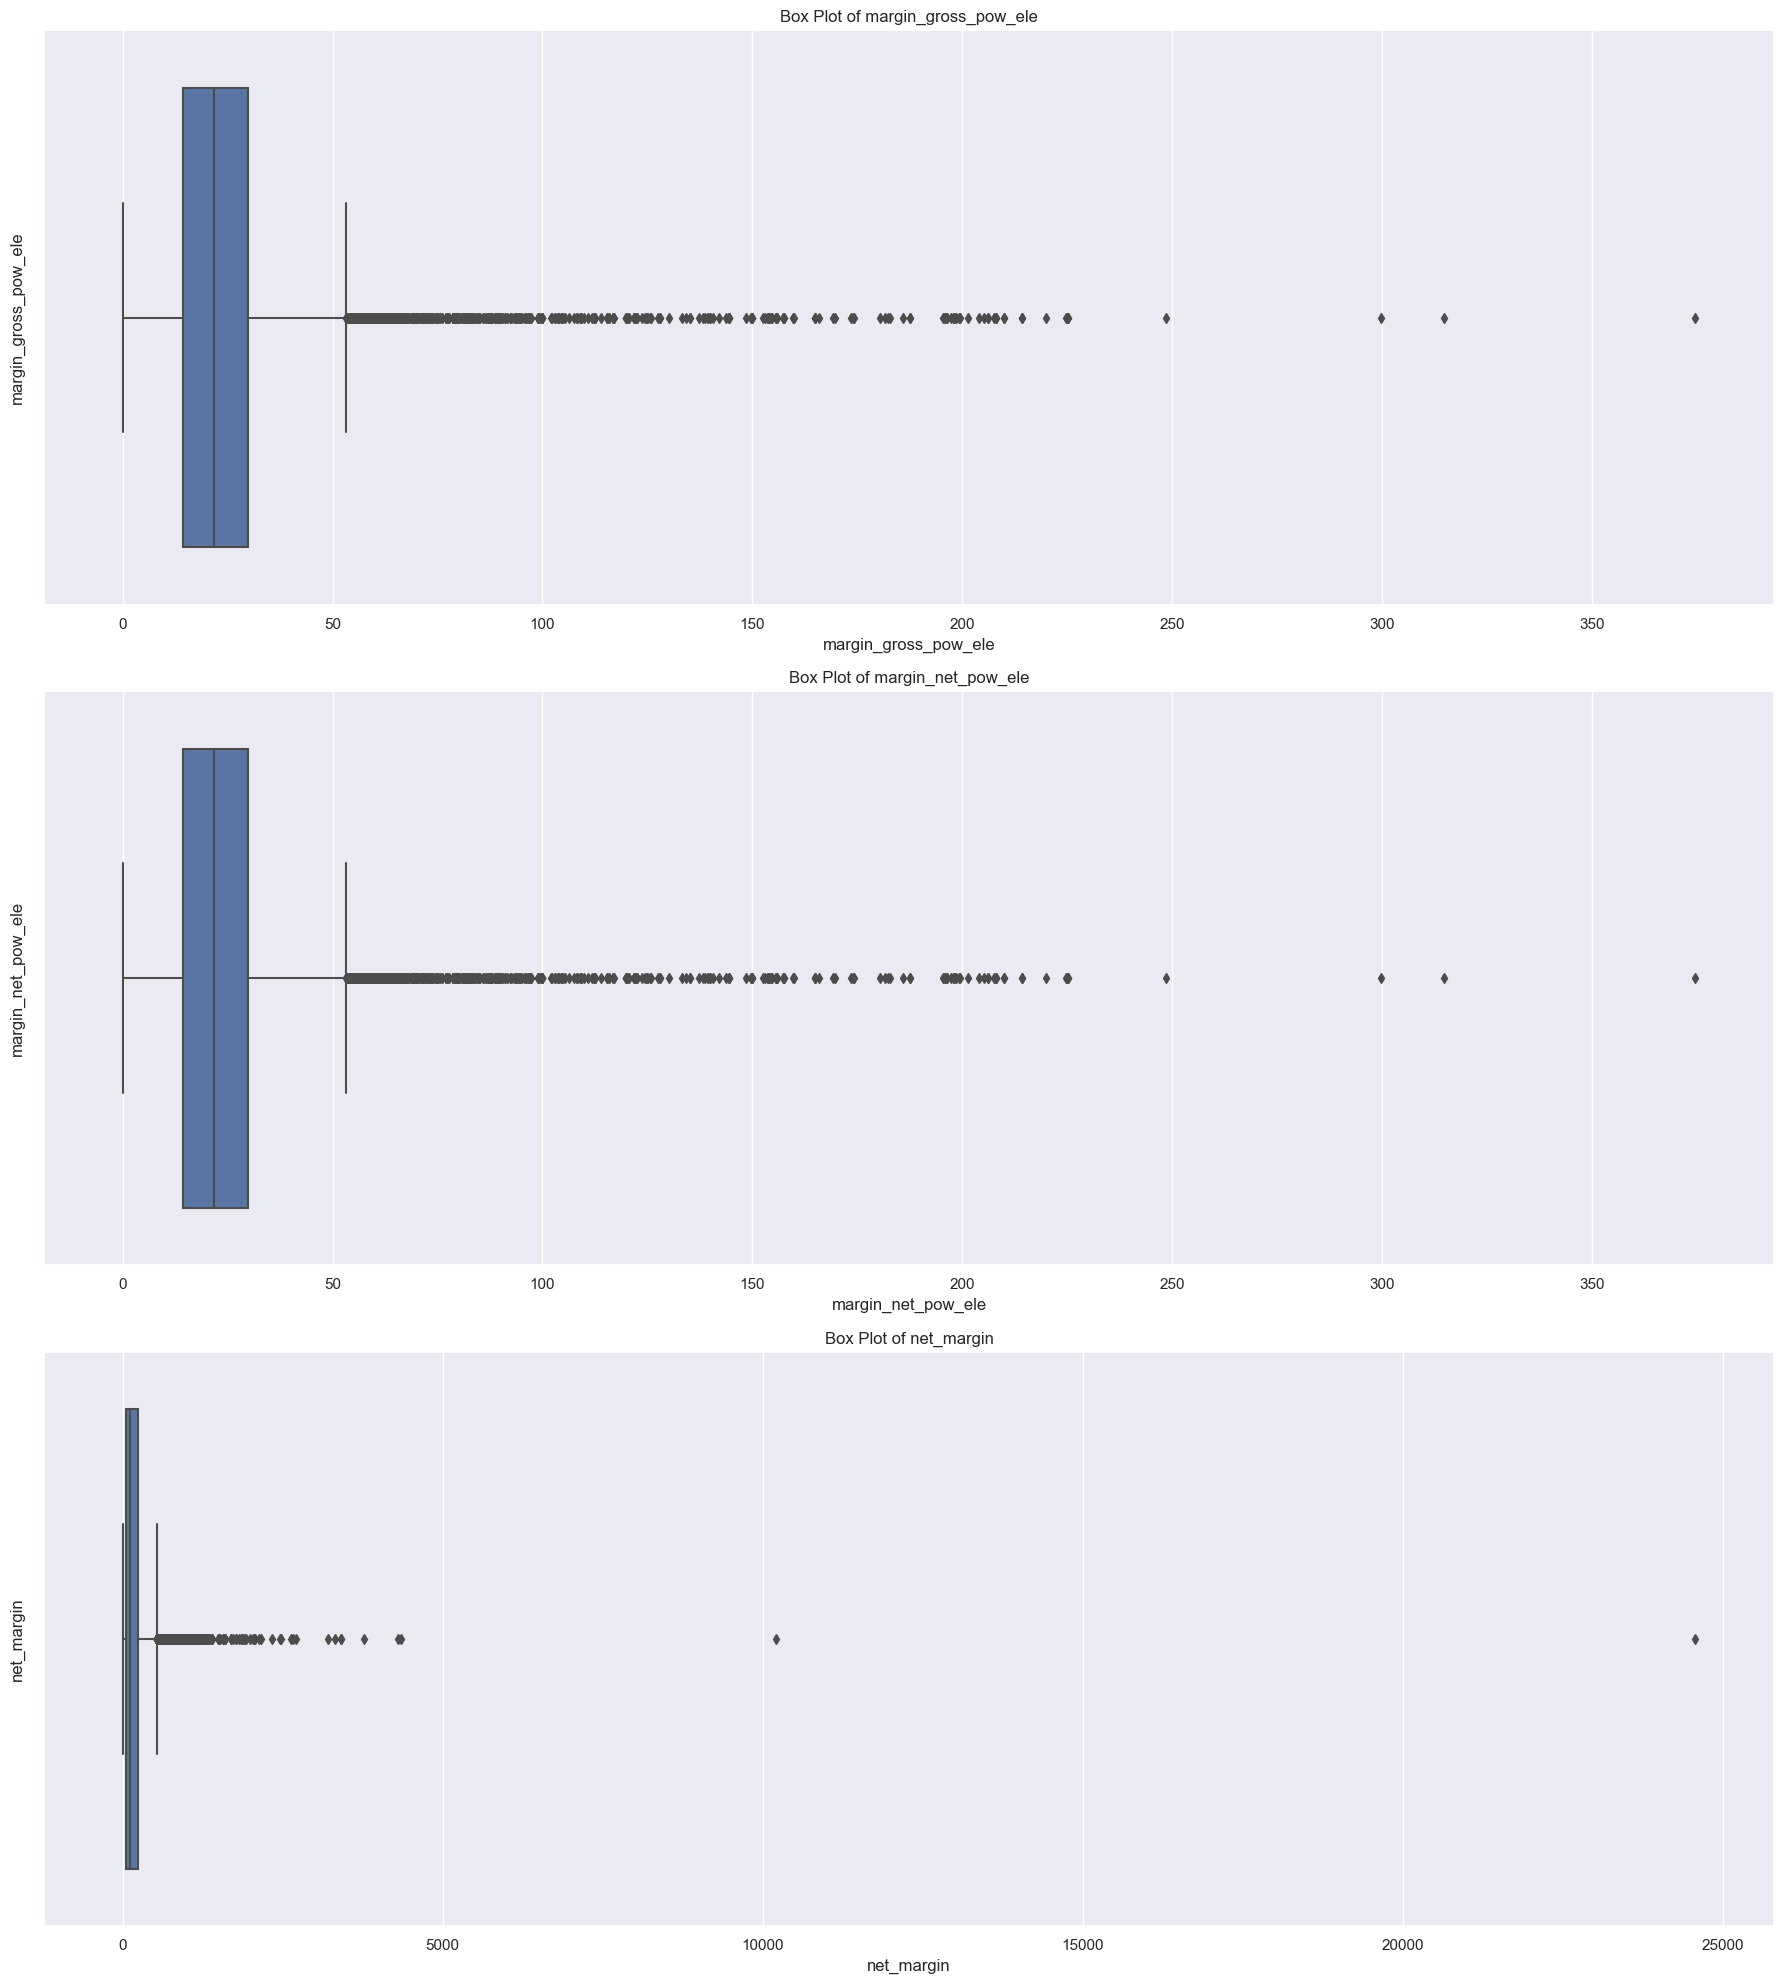

In [32]:
box_plot_all_columns(margin)

  •♦• We can also notice certain outliers in this data

# Subscribed power

In [33]:
power = df_client[['id', 'pow_max', 'churn']]

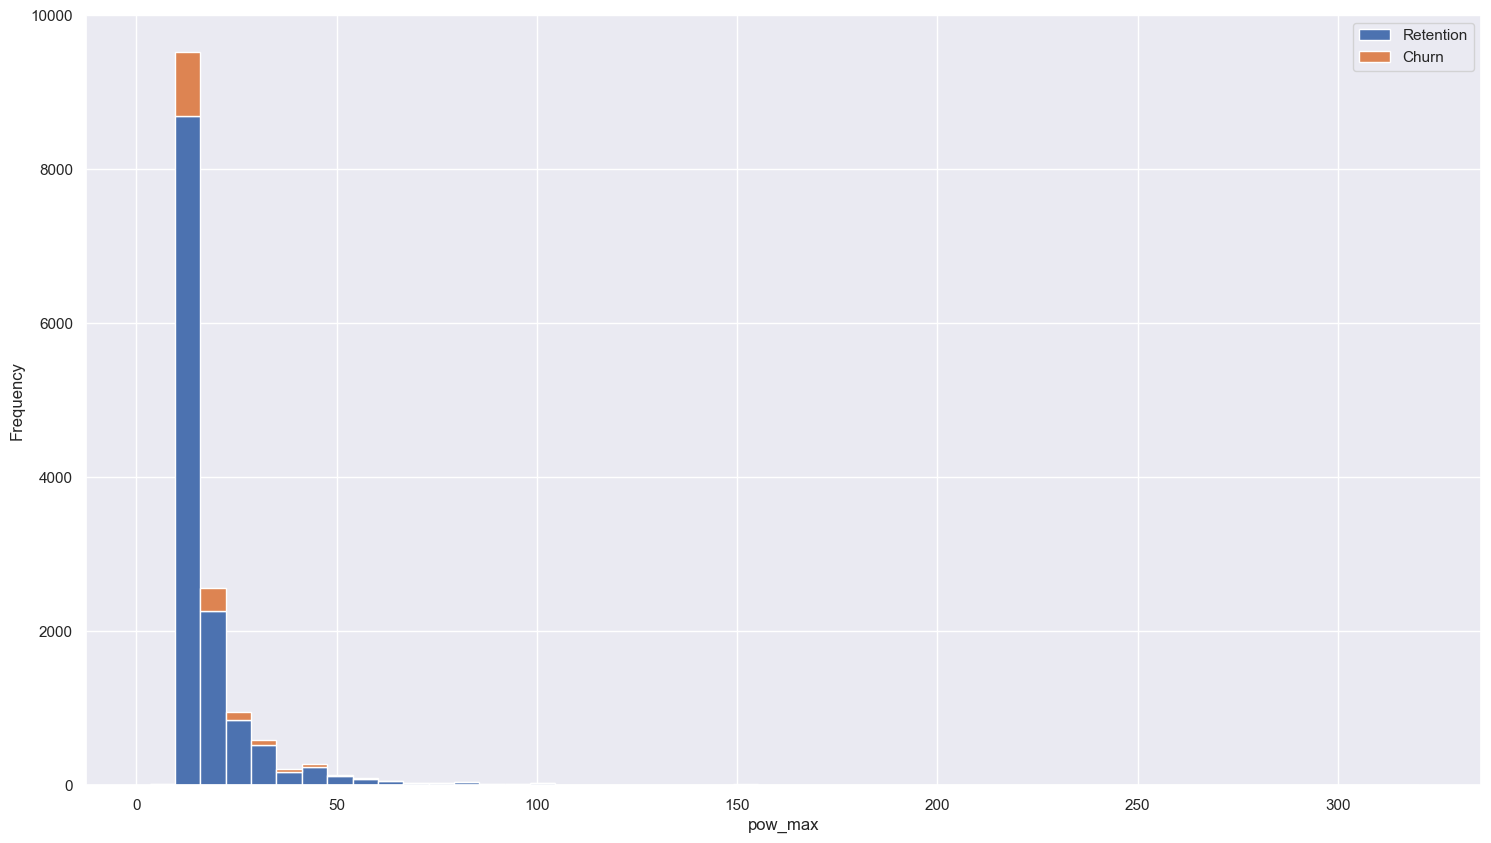

In [34]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

plt.savefig("View of Subscribed power.png", bbox_inches="tight")

# Other columns

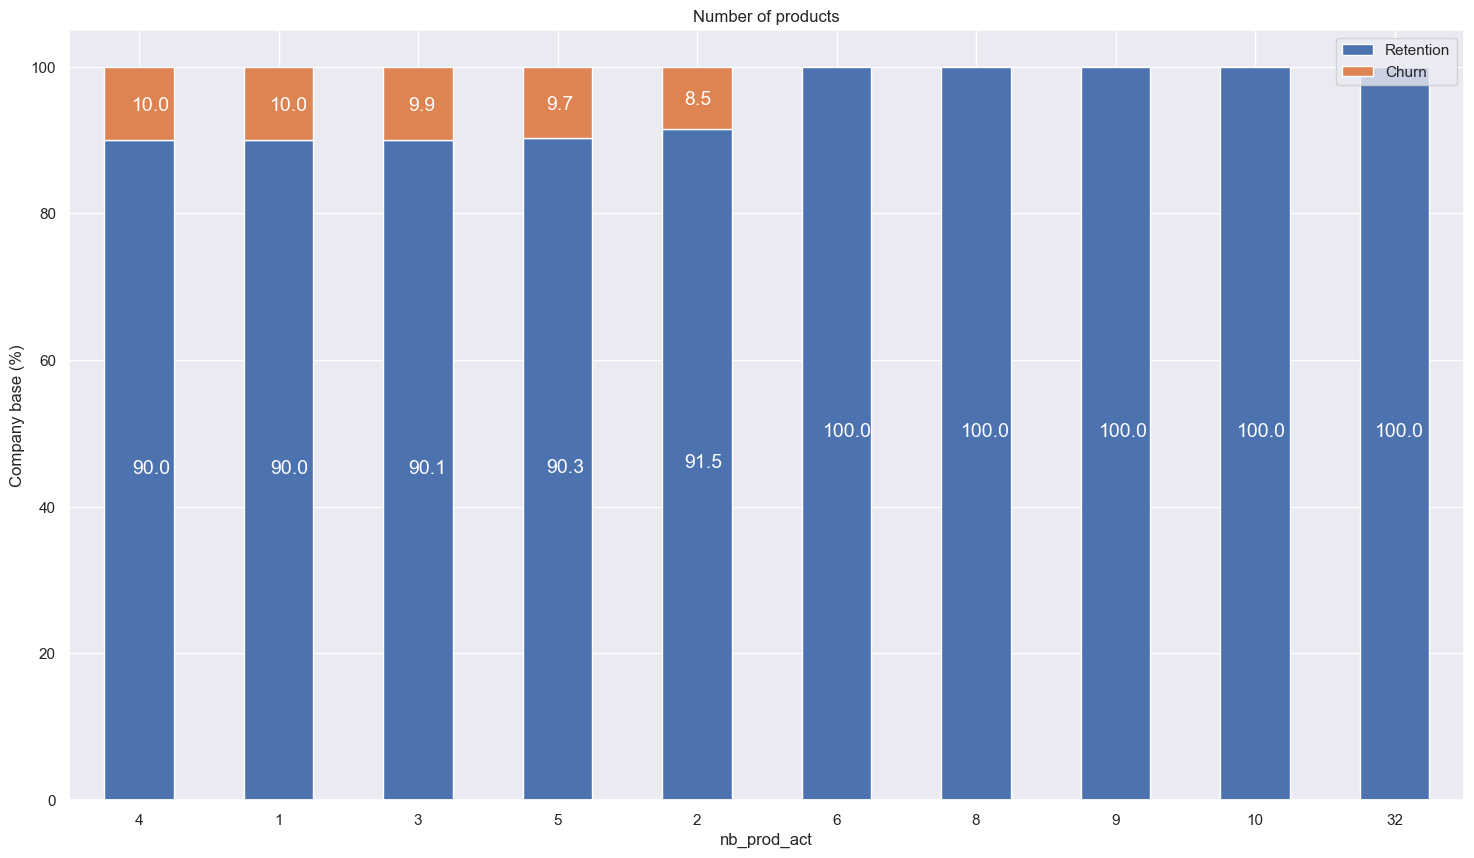

In [35]:
other_cols = df_client[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

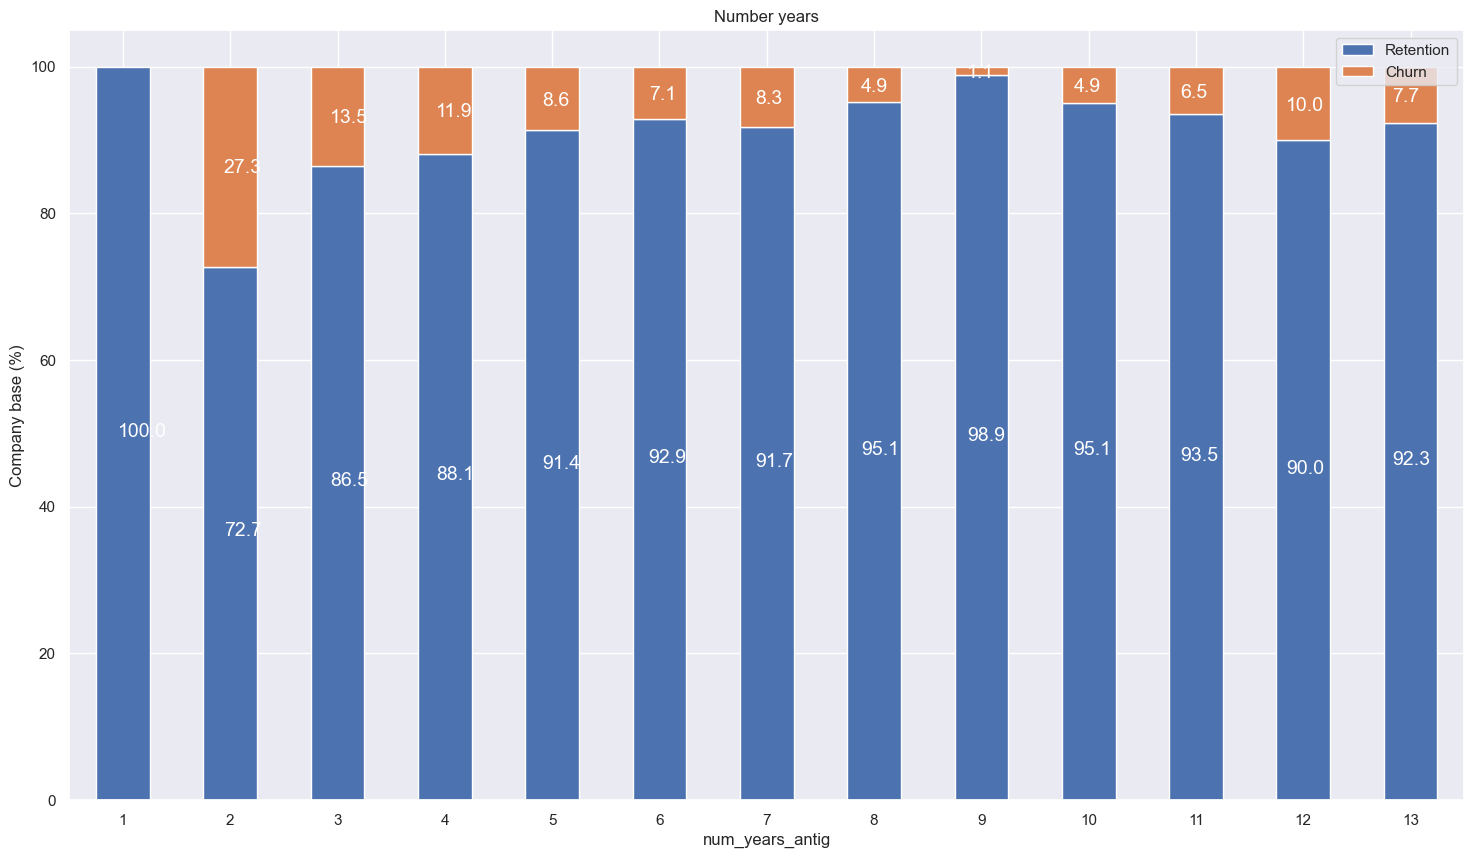

In [36]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

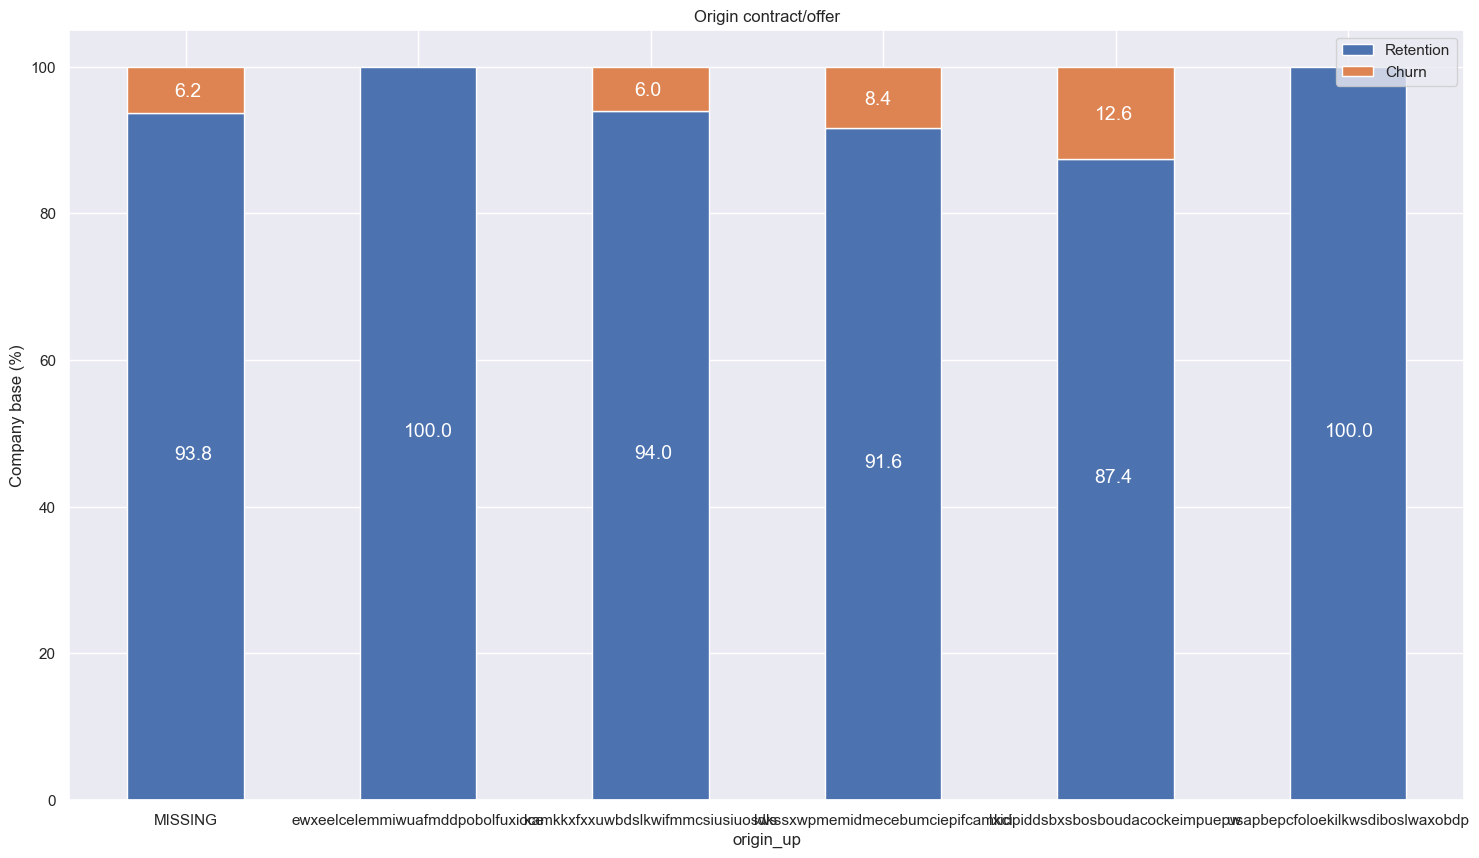

In [37]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# 5: Hypothesis Investigation

    •♦• Since we have investigated the information, now is the ideal time to explore whether cost responsiveness has some effect on stir. First we want to characterize precisely exact thing is cost responsiveness.

In [38]:
df_client["date_activ"] = pd.to_datetime(df_client["date_activ"], format='%Y-%m-%d')
df_client["date_end"] = pd.to_datetime(df_client["date_end"], format='%Y-%m-%d')
df_client["date_modif_prod"] = pd.to_datetime(df_client["date_modif_prod"], format='%Y-%m-%d')
df_client["date_renewal"] = pd.to_datetime(df_client["date_renewal"], format='%Y-%m-%d')

df_price['price_date'] = pd.to_datetime(df_price['price_date'], format='%Y-%m-%d')

In [39]:
mean_year=df_price.groupby(['id']).mean().reset_index()
mean_6m=df_price[df_price['price_date']> '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m=df_price[df_price['price_date']> '2015-10-01'].groupby(['id']).mean().reset_index()

In [40]:
mean_year.head(1)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694


In [41]:
mean_year=mean_year.drop('price_date',axis=1)
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [42]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [43]:
mean_6m=mean_6m.drop('price_date',axis=1)
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_6m["mean_year_price_off_peak"] = mean_6m["mean_year_price_off_peak_var"] + mean_6m["mean_year_price_off_peak_fix"]
mean_6m["mean_year_price_peak"] = mean_6m["mean_year_price_peak_var"] + mean_6m["mean_year_price_peak_fix"]
mean_6m["mean_year_price_med_peak"] = mean_6m["mean_year_price_mid_peak_var"] + mean_6m["mean_year_price_mid_peak_fix"]

In [44]:
mean_3m=mean_3m.drop('price_date',axis=1)
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [45]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [46]:
price_features.head(1)

,id,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,...,mean_year_price_med_peak_y,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274


♦ Now lets merge in the churn data and see whether price sensitivity has any correlation with churn

In [47]:
price_churn = pd.merge(price_features, df_client[['id', 'churn']], on='id')
price_churn.head()

,id,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,mean_year_price_med_peak_x,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


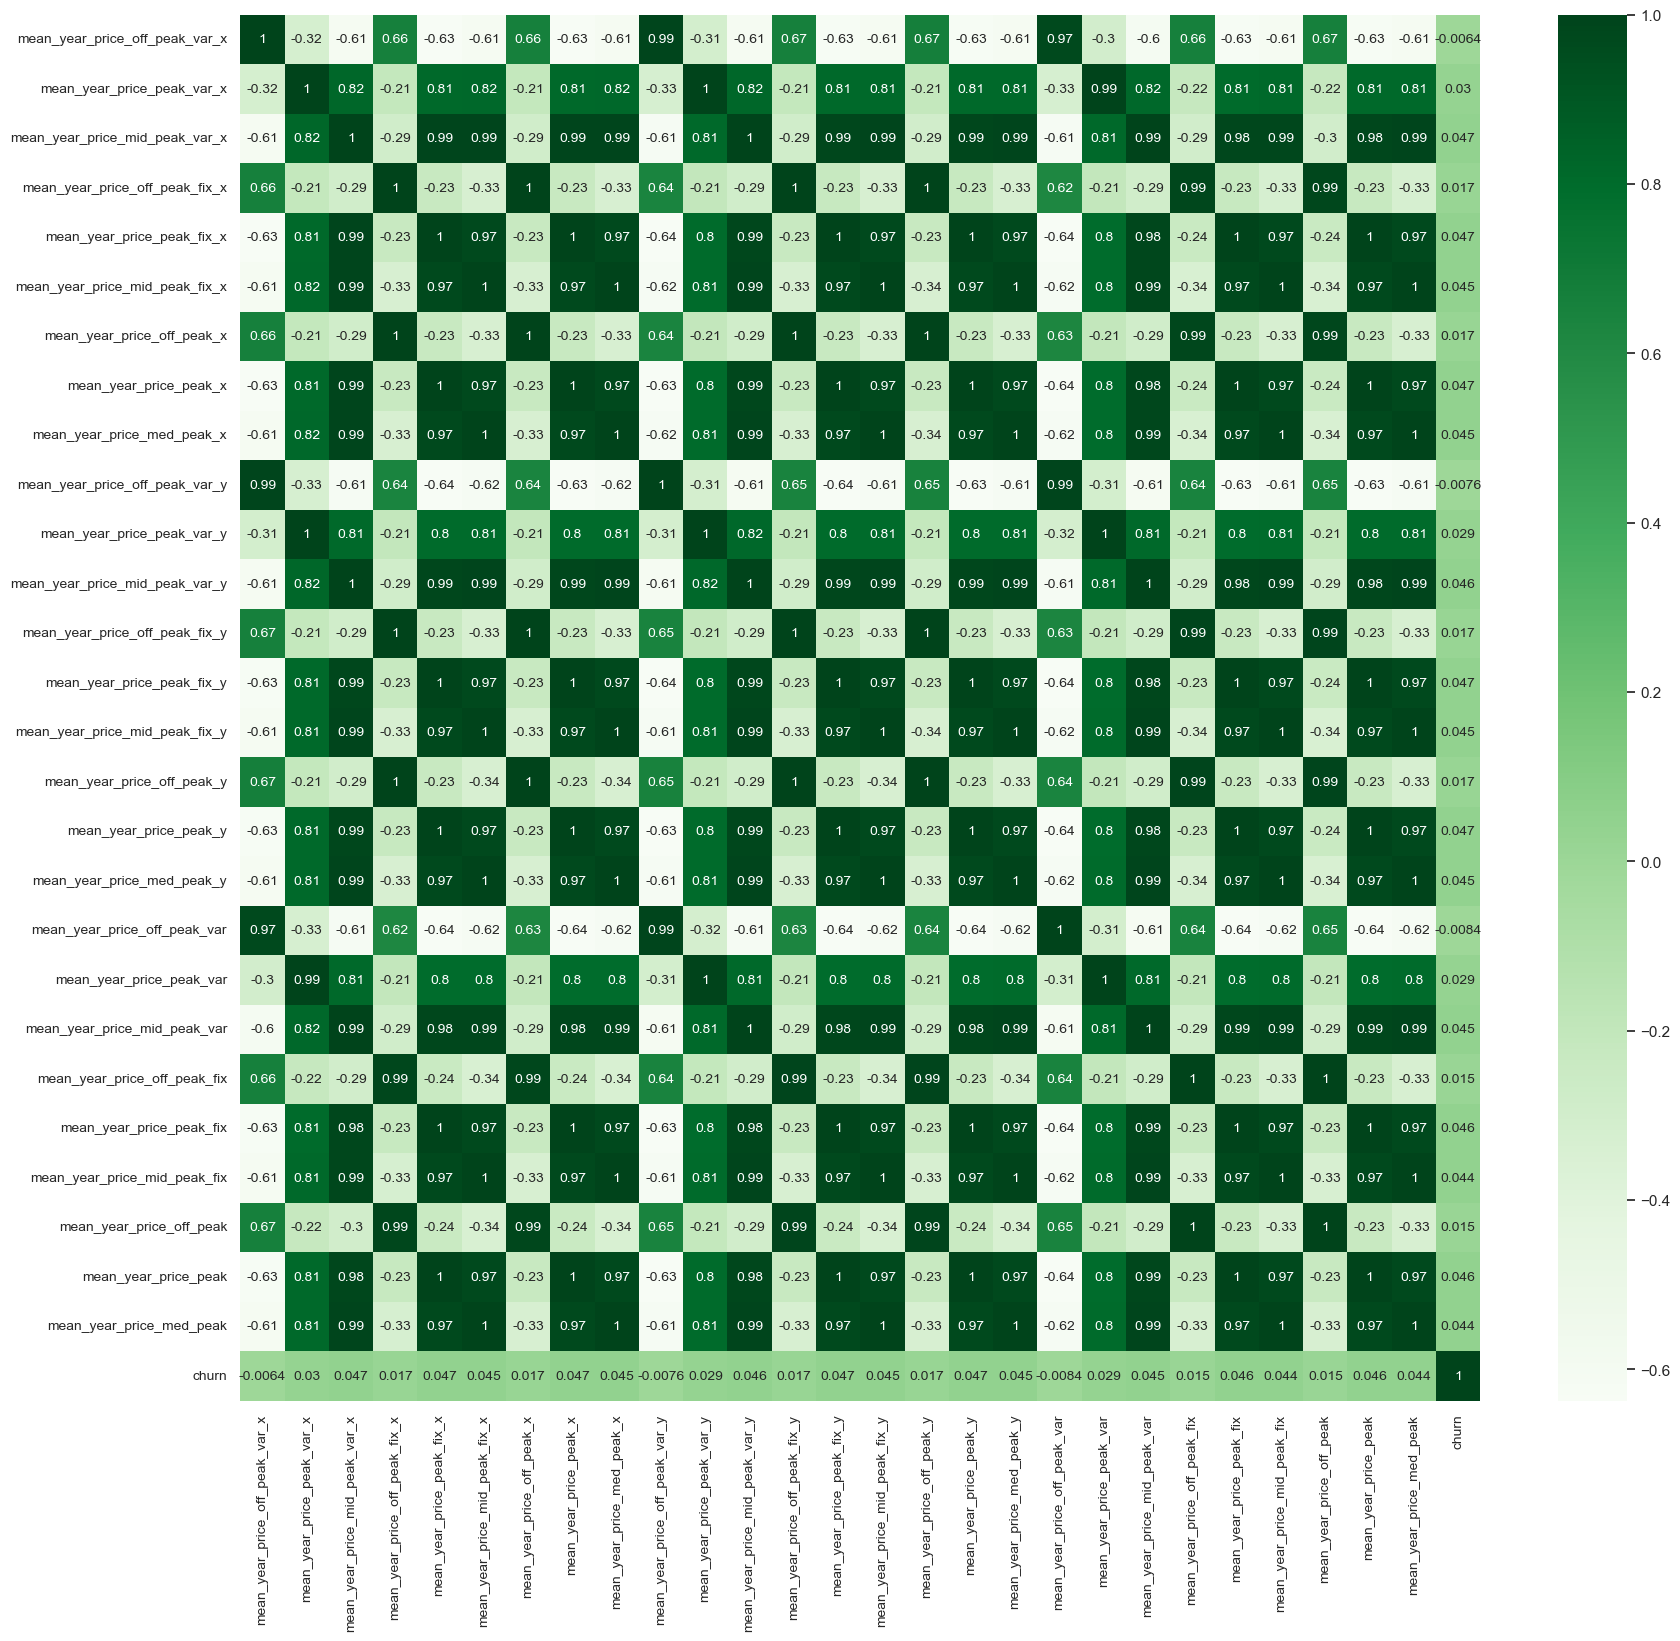

In [48]:
numeric_columns = price_churn.select_dtypes(include=[np.number])


corr = numeric_columns.corr()

# Plot correlation
plt.figure(figsize=(20, 18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot=True, annot_kws={'size': 10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


•♦• Although the association with churn is generally quite modest, the correlation plot reveals a higher degree of correlation with other price sensitivity variables. This suggests that price sensitivity and churn have a shaky linear relationship. This shows that we might need to develop the feature differently if we want price sensivity to be a significant factor in predicting churn.

In [49]:
churn_data = pd.merge(df_client.drop(columns=['churn']), price_churn, on='id')

In [200]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [201]:
churn_data.to_csv('C:\\Users\\ASUS\\OneDrive\\Desktop\\bcg\\churn_data_modeling.csv')